In [1]:
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/antropometria00.csv"

df = pd.read_csv(file_path)
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
1,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
2,241555,3,24,SAN LUIS POTOSI,1,10,7,31.90,1,141.45,...,20:12,1,20:19,1,M2435,5,3,1,588.463281,245
3,211879,2,21,PUEBLA,2,10,9,31.95,2,134.95,...,22:22,2,15:11,1,M2144,1,1,1,1879.750532,211
4,80135,3,8,CHIHUAHUA,2,11,9,32.40,1,136.60,...,18:32,3,18:32,1,M0804,7,1,1,589.164005,85


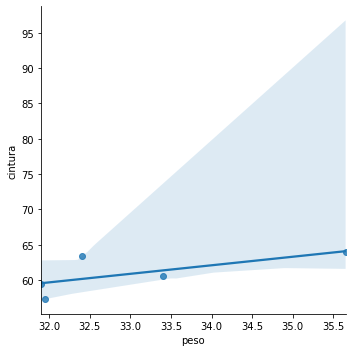

In [2]:

sns.lmplot(x= "peso",
          y ="cintura",
          data = df,
          fit_reg = True)


Text(0.5, 1.0, 'regresión lineal')

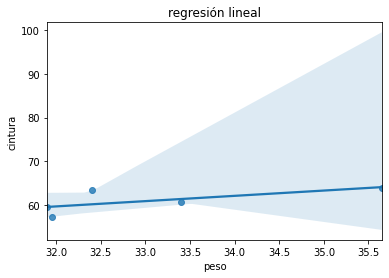

In [3]:
reg_plot= sns.regplot (x = "peso",
                      y = "cintura",
                      data = df)
reg_plot.set_title("regresión lineal")


In [4]:
x = df ["peso"].values
y = df ["cintura"].values

In [5]:
x

array([35.65, 33.4 , 31.9 , 31.95, 32.4 ])

In [6]:
ny.corrcoef(x,y)

array([[1.        , 0.68291156],
       [0.68291156, 1.        ]])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """


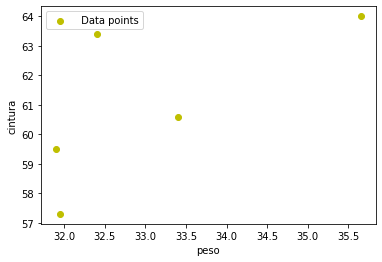

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.scatter(x =x, y=y,         
           c="Y",
           label = " Data points")
plt.xlabel("peso")
plt.ylabel("cintura")

plt.legend()
plt.show()

In [13]:
import statsmodels.api as sm

model = sm.OLS.from_formula("y~x",
                           data = df)
result = model.fit()
result.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     2.622
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.204
Time:                        12:44:40   Log-Likelihood:                -10.074
No. Observations:                   5   AIC:                             24.15
Df Residuals:                       3   BIC:                             23.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9768     24.715      0.849      0.458     -57.678      99.632
x              1.2094      0.747      1.619      0.204      -1.168       3.586
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.244
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                           0.705   Prob(JB):                        0.797
Kurtosis:                       2.567   Cond. No.                         781.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
x = pd.DataFrame (df["peso"])
y = pd.DataFrame(df["cintura"])
model_lm = lm.fit(x, y)
model_lm

LinearRegression()

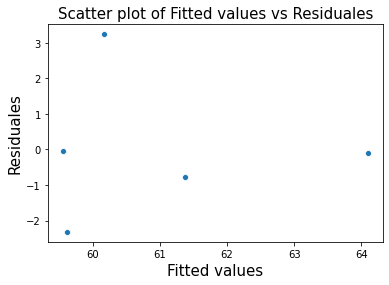

In [15]:
pp = sns.scatterplot( x = result.fittedvalues, 
                    y = result.resid)
pp.set_xlabel("Fitted values",
             size = 15)
pp.set_ylabel("Residuales",
             size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuales",
            size = 15)
plt.show()

In [11]:
result.resid

KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"